# Forecasting Exercises - Solutions
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.


In [23]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Simple math function
from math import sqrt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Load datasets

path="./"
df = pd.read_csv(path + 'HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

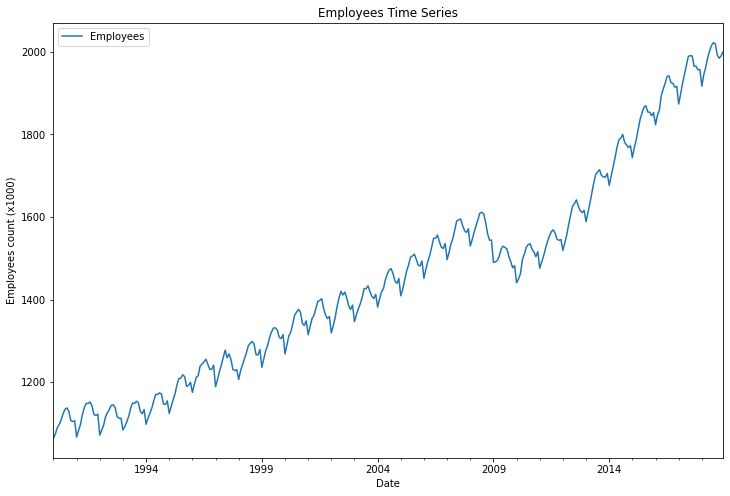

In [ ]:
## CODE HERE

# Setting up canvas
fix, ax = plt.subplots(figsize=(12,8))

# Placing a plot to an ax
df.plot(ax=ax)

# Doing some Lord's work
ax.set_title("Employees Time Series")
ax.set_ylabel("Employees count (x1000)")

# Exhibit
plt.show()





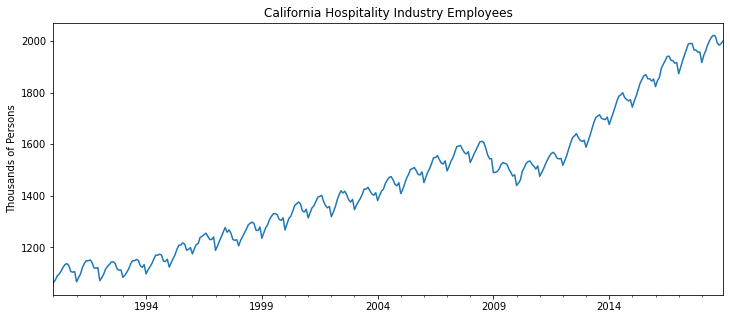

In [ ]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

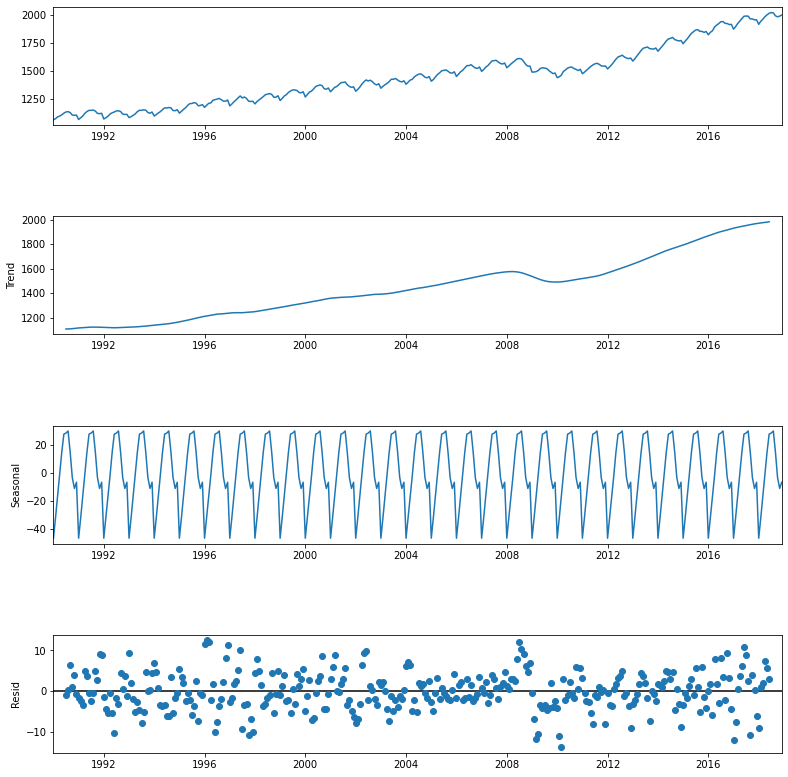

In [ ]:
# This is done by statsmodels.tsa.seasonal.seasonal_decompose function
# This function returns an object of DecomposeResult, which we can later plot and work with further
decomposed = seasonal_decompose(df, model="additive")

# Here I am plotting the decomposed result of ETS decomposition (added to figure)
fig = decomposed.plot()
fig.set_size_inches((12,12))
plt.show()

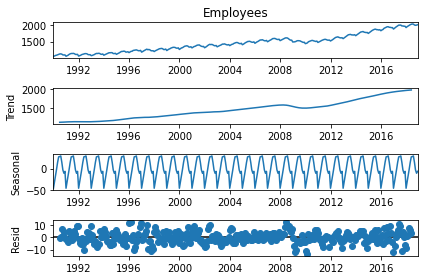

In [ ]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [ ]:
# Automatical search for best hyper-parameters using auto_arima
best_model = auto_arima(df["Employees"],    # time series
                        d=1,                # setting of differencing start with 1 (clearly the data is not stationary)
                        seasonal=True,      # is it seasonal? yes
                        m=12,               # if m=1 -> non-seasonal (yearly data); m=12 -> monthly data
                        stepwise=True)      # default = True; The stepwise algorithm can be significantly
                                            # faster than fitting all (or a random subset of) hyper-parameter
                                            # combinations and is less likely to over-fit the model.         

In [ ]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 28 Oct 2021   AIC                           2208.504
Time:                                      12:48:56   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.572      0.000       0.836       1.012
ma.L1         -0.9440      0.070    -13.484      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.142      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    701.159      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.312      0.000      -0.834      -0.664
sigma2        29.2982      1.717     17.067      0.000      25.934      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 27 Oct 2021   AIC                           2208.504
Time:                                      21:19:56   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (1,1,2) 
combined with a seasonal order of (1,0,1,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [4]:
# Setting test size to 12 months (12 observations)
test_size = 12

# Splitting the df["Employees"] Series using .iloc
y_train = df["Employees"].iloc[:-test_size]
y_test  = df["Employees"].iloc[-test_size:]

# Checking out shapes of the two sets
y_train.shape, y_test.shape

((336,), (12,))

### 5. Fit the recommended model to the training set

In [5]:
# Initializing SARIMAX model with best-found parameters
model = SARIMAX(y_train, order=(1,1,2), seasonal_order=(1,0,1,12))

# Fitting the model
model_fit = model.fit()

### 6. Obtain predicted values

In [18]:
# Getting the prediction on next 12 months (remember we have the true observations in y_test)
y_pred = model_fit.forecast(steps=12)

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

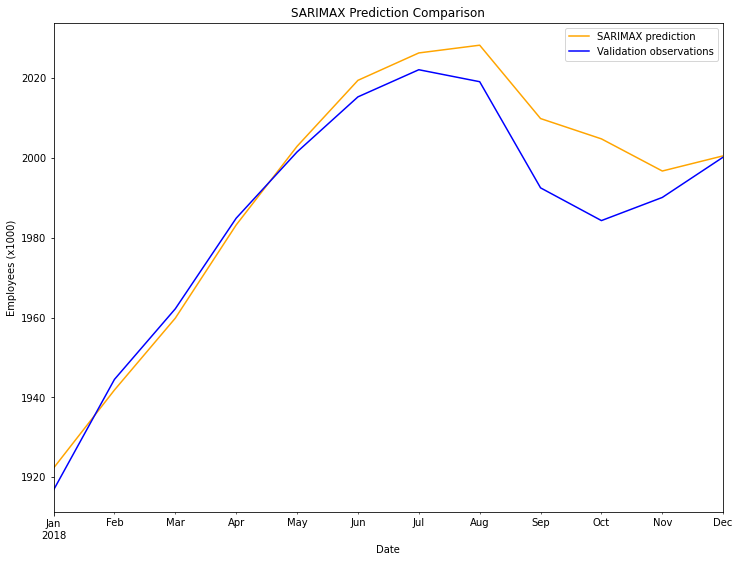

In [19]:
fig, ax = plt.subplots(figsize=(12,9))

# Plotting predicted values
y_pred.plot(ax=ax, label="SARIMAX prediction", color="orange")

# Plotting validation values
y_test.plot(ax=ax, label="Validation observations", color="blue")

# Completing the plot with mandatory elements
ax.legend()
ax.set_title("SARIMAX Prediction Comparison")
ax.set_ylabel("Employees (x1000)")

plt.show()

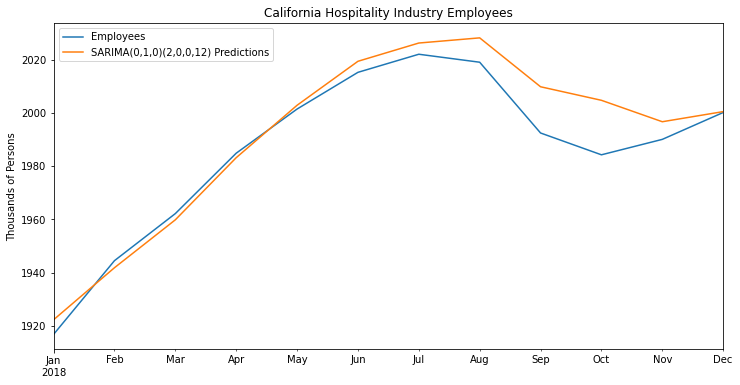

In [ ]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [24]:
print(f"MSE Error  : {mean_squared_error(y_true=y_test, y_pred=y_pred)}")
print(f"RMSE Error : {sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))}")

MSE Error  : 77.56247404419666
RMSE Error : 8.80695600330765


In [ ]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error:  77.6604355
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 8.812515844


### 9. Retrain the model on the full data and forecast one year into the future

In [37]:
# Let's initialize SARIMAX with all the data and the same parameters
model = SARIMAX(df["Employees"], order=(1,1,2), seasonal_order=(1,0,1,12))
model_fit = model.fit()

# Storing the forecast as a series
y_pred = model_fit.forecast(steps=12)

In [42]:
y_pred

2019-01-01    1963.876841
2019-02-01    1986.819992
2019-03-01    2006.002581
2019-04-01    2030.339387
2019-05-01    2050.321071
2019-06-01    2067.147502
2019-07-01    2074.928903
2019-08-01    2076.493410
2019-09-01    2056.904405
2019-10-01    2051.849582
2019-11-01    2047.936759
2019-12-01    2053.902631
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

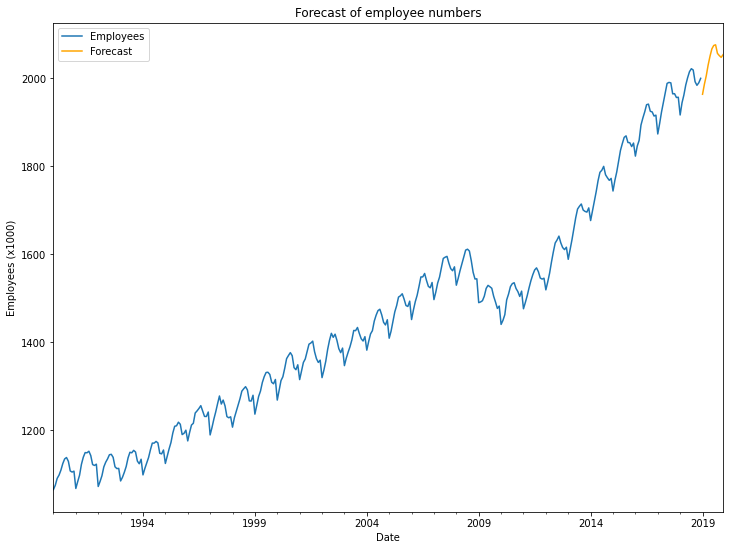

In [48]:
fig, ax = plt.subplots(figsize=(12,9))

df.plot(ax=ax, label="History")
y_pred.plot(ax=ax, label="Forecast", color="orange")

ax.legend()
ax.set_title("Forecast of employee numbers")
ax.set_ylabel("Employees (x1000)")
plt.show()



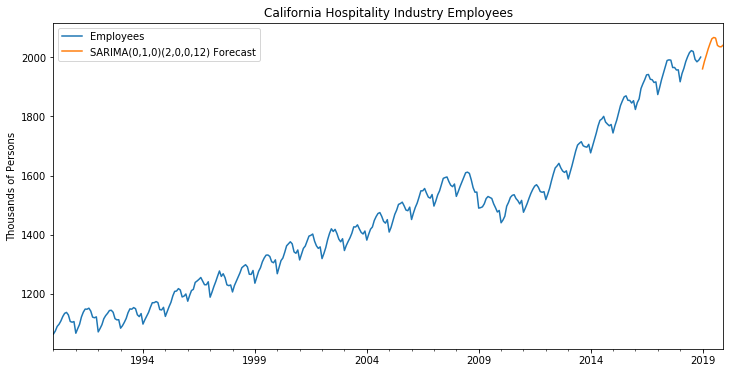

In [ ]:
# DON'T WRITE HERE


## Great job!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>